# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [10]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [11]:
# Define transforms
## YOUR CODE HERE ##



import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define the transformations to apply to the data
transform = transforms.Compose([
    transforms.ToTensor(), # Convert image to tensor
    transforms.Normalize((0.1307,), (0.3081,)) # Normalize the image pixel values
])

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Split the training dataset into training and validation sets
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [50000, 10000])

# Create data loaders for the training, validation, and testing datasets
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


print(f'Training dataset size: {len(train_dataset)}')
print(f'Validation dataset size: {len(val_dataset)}')
print(f'Testing dataset size: {len(test_dataset)}')

Training dataset size: 50000
Validation dataset size: 10000
Testing dataset size: 10000


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I have used the following transforms:
1. ToTensor():
    - converts the image into numbers, that are understandable by the system.
    - It separates the image into three color channels (separate images): red, green & blue.
    - Then it converts the pixels of each image to the brightness of their color between 0 and 255.
    - These values are then scaled down to a range between 0 and 1. The image is now a Torch Tensor.

2. Normalize():
    - Normalizes the tensor with a mean and standard deviation (0.5 and 0.5) in our case

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [12]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


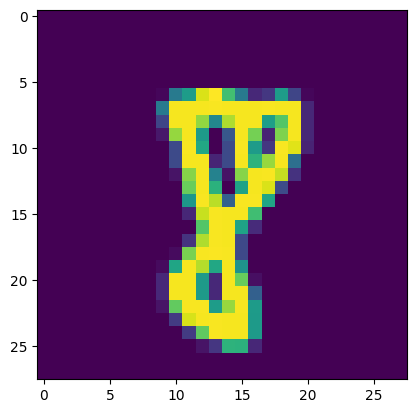

2


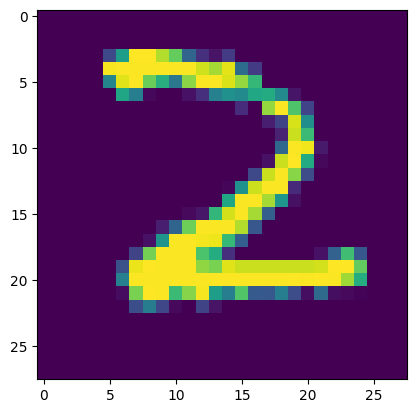

1


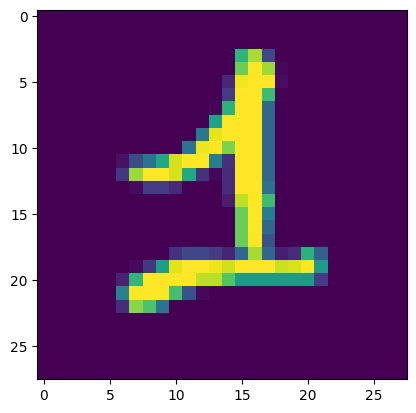

0


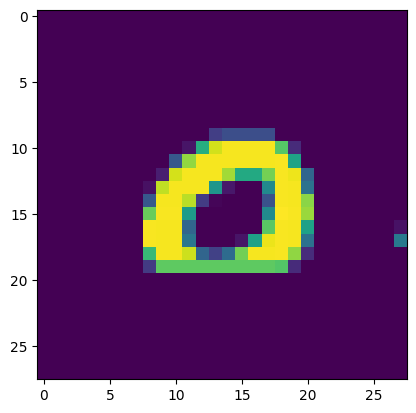

8


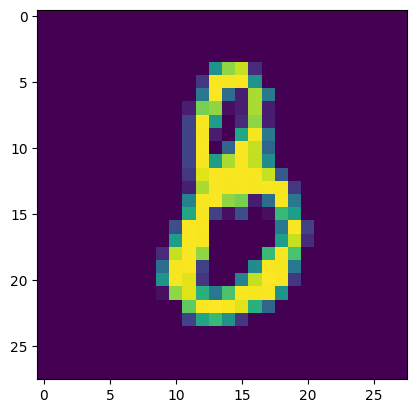

In [13]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [14]:
# Define the class for your neural network
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.fc1 = nn.Linear(784, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.fc3(x)
        return x

In [15]:
## YOUR CODE HERE ##
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

  The transforms chosen for the MNIST dataset are ToTensor() and Normalize(). The ToTensor() transform converts the PIL image or NumPy array to a PyTorch tensor with values ranging from 0 to 1. The Normalize() transform normalizes the tensor image with mean and standard deviation. In this case, the mean and standard deviation values of 0.1307 and 0.3081 are used, which are the global mean and standard deviation of the MNIST dataset.

  These transforms are important preprocessing steps because they help to standardize the input data, making it easier for the neural network to learn from the data. Normalizing the data can also help to improve the training speed and performance of the neural network.

In [16]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
cnn_model = Net()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.003, momentum=0.9)

# We have used LogSoftmax activation as the last layer (technically, it's the logarithm of a Softmax function) and CrossEntropyLoss()
# as it is a classification problem.

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [17]:
# Define the training function
running_losses = []
epoch_loss = []
def train(model, device, train_loader, optimizer, epoch):
    running_loss = 0
    # Set the model to "train".
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        # Move the data to GPU/CPU device accordingly.
#         data, target = data.to(device), target.to(device)
        # flush out the existing gradients.
        optimizer.zero_grad()
        # Calculate the outputs of the model
        output = model(data)
        # Compute the loss.
        loss = criterion(output, target)
        # Compute the gradients.
        loss.backward()
        # Update the weights/biases variables.
        optimizer.step()
        # Add the loss to the running_loss.
        running_loss += loss.item()

        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
        running_losses.append(loss.item())
    else:
        epoch_loss.append(running_loss / len(train_loader))


# Define the testing function
test_losses = []
val_losses = []
def test(model, device, test_loader, validation=False):
    # Set the model to "eval" mode.
    model.eval()
    test_loss = 0
    correct = 0
    # Remove the gradient calculation part.
    with torch.no_grad():
        for data, target in test_loader:
#             data, target = data.to(device), target.to(device)
            output = model(data)
            # compute the test loss.
            test_loss += nn.functional.nll_loss(output, target, reduction='sum').item()
            # Get the maximum arguments of the outputs.
            pred = output.argmax(dim=1, keepdim=True)
            # Check the total number of correct predictions made by the model.
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    if validation:
        val_losses.append(test_loss)
    accuracy = 100. * correct / len(test_loader.dataset)
    print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)'.format(
        test_loss, correct, len(test_loader.dataset), accuracy))
    return test_loss, accuracy

In [18]:
# Training the CNN model for 50 epochs.
epochs = 10
for epoch in range(1, epochs+1):
    train(cnn_model, device, train_loader, optimizer, epoch)
    test(cnn_model, device, val_loader, validation=True)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.308327
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.000924
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.545162
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.398695
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.238678
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.194653
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.200039
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.283506
Test set: Average loss: -7.9266, Accuracy: 9213/10000 (92%)
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.408807
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.167812
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.192154
Train Epoch: 2 [19200/50000 (38%)]	Loss: 0.243110
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.248410
Train Epoch: 2 [32000/50000 (64%)]	Loss: 0.122496
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.193415
Train Epoch: 2 [44800/50000 (90%)]	Loss: 0.282898
Test set: Average loss: -8.6127, Accuracy: 9444/10000 (94%)
Train Epoch: 3 [0/50000 (0%)]	Loss: 0.346217
Train Epoch: 3 [6400/50000 (13%)]	Loss: 0.09461

Plot the training loss (and validation loss/accuracy, if recorded).

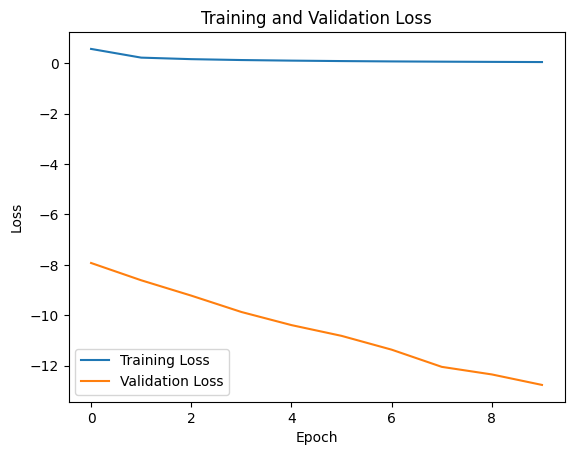

In [19]:
## YOUR CODE HERE ##
fig, ax = plt.subplots()
ax.plot(epoch_loss, label='Training Loss')
ax.plot(test_losses, label='Validation Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss')
ax.legend()

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
## YOUR CODE HERE ##
test(cnn_model, device, test_loader)

Test set: Average loss: -12.9971, Accuracy: 9735/10000 (97%)


(-12.997133166503906, 97.35)

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [21]:
## YOUR CODE HERE ##
# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64*7*7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64*7*7)
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.dropout(x, training=self.training)
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

In [22]:
running_losses = []
epoch_loss = []
test_losses = []
val_losses = []
running_loss = 0
test_loss = 0
correct = 0


In [23]:
# Training the CNN model for 50 epochs.
epochs = 50
for epoch in range(1, epochs+1):
    train(cnn_model, device, train_loader, optimizer, epoch)
    test(cnn_model, device, val_loader, validation=True)

Train Epoch: 1 [0/50000 (0%)]	Loss: 0.061035
Train Epoch: 1 [6400/50000 (13%)]	Loss: 0.034923
Train Epoch: 1 [12800/50000 (26%)]	Loss: 0.018665
Train Epoch: 1 [19200/50000 (38%)]	Loss: 0.026163
Train Epoch: 1 [25600/50000 (51%)]	Loss: 0.023317
Train Epoch: 1 [32000/50000 (64%)]	Loss: 0.017264
Train Epoch: 1 [38400/50000 (77%)]	Loss: 0.007516
Train Epoch: 1 [44800/50000 (90%)]	Loss: 0.006514
Test set: Average loss: -13.4163, Accuracy: 9722/10000 (97%)
Train Epoch: 2 [0/50000 (0%)]	Loss: 0.042978
Train Epoch: 2 [6400/50000 (13%)]	Loss: 0.040467
Train Epoch: 2 [12800/50000 (26%)]	Loss: 0.011130
Train Epoch: 2 [19200/50000 (38%)]	Loss: 0.010115
Train Epoch: 2 [25600/50000 (51%)]	Loss: 0.012924
Train Epoch: 2 [32000/50000 (64%)]	Loss: 0.006283
Train Epoch: 2 [38400/50000 (77%)]	Loss: 0.030792
Train Epoch: 2 [44800/50000 (90%)]	Loss: 0.059334
Test set: Average loss: -13.5236, Accuracy: 9732/10000 (97%)
Train Epoch: 3 [0/50000 (0%)]	Loss: 0.063827
Train Epoch: 3 [6400/50000 (13%)]	Loss: 0.030

In [24]:
test(cnn_model, device, test_loader)

Test set: Average loss: -26.0128, Accuracy: 9770/10000 (98%)


(-26.012800558471678, 97.7)

## Saving your model
Using `torch.save`, save your model for future loading.

In [30]:
# Specify the path to save the model
model_path = './saved_models.pth'

# Save the model
torch.save(cnn_model.state_dict(), model_path)

In [31]:
# new_model = torch.load('./saved_models')